In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier

In [4]:
df = pd.read_csv("high_diamond_ranked_10min.csv")

In [6]:
df.shape

(9879, 40)

In [ ]:
df.isnull().sum()

In [9]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [ ]:
df.info()

In [11]:
df.drop("gameId", axis=1, inplace=True)

In [12]:
df["blueWins"].value_counts()

blueWins
0    4949
1    4930
Name: count, dtype: int64

In [13]:
hist_arr = [
    "blueWardsPlaced", "redWardsPlaced",
    "blueWardsDestroyed", "redWardsDestroyed",
    "blueFirstBlood", "redFirstBlood",
    "blueKills", "redKills",
    "blueDeaths", "redDeaths",
    "blueAssists", "redAssists",
    "blueEliteMonsters", "redEliteMonsters",
    "blueDragons", "redDragons",
    "blueHeralds", "redHeralds",
    "blueTowersDestroyed", "redTowersDestroyed",
    "blueTotalGold", "redTotalGold",
    "blueAvgLevel", "redAvgLevel",
    "blueTotalExperience", "redTotalExperience",
    "blueTotalMinionsKilled", "redTotalMinionsKilled",
    "blueTotalJungleMinionsKilled", "redTotalJungleMinionsKilled",
    "blueGoldDiff", "redGoldDiff",
    "blueExperienceDiff", "redExperienceDiff",
    "blueCSPerMin", "redCSPerMin",
    "blueGoldPerMin", "redGoldPerMin"
]

In [14]:
len(hist_arr)

38

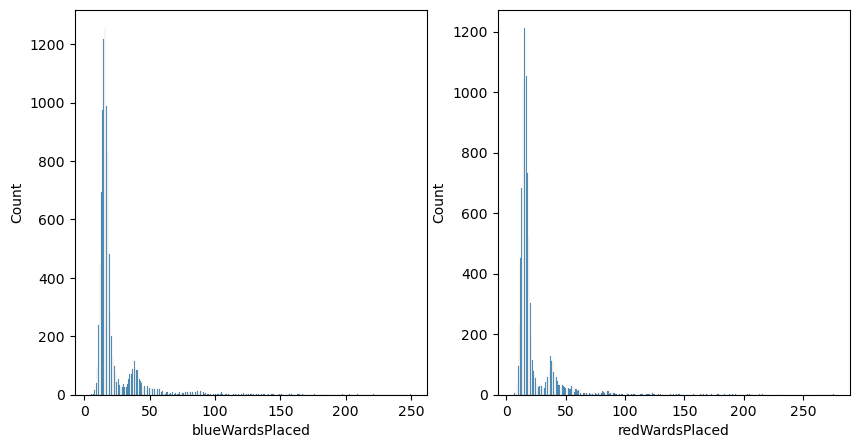

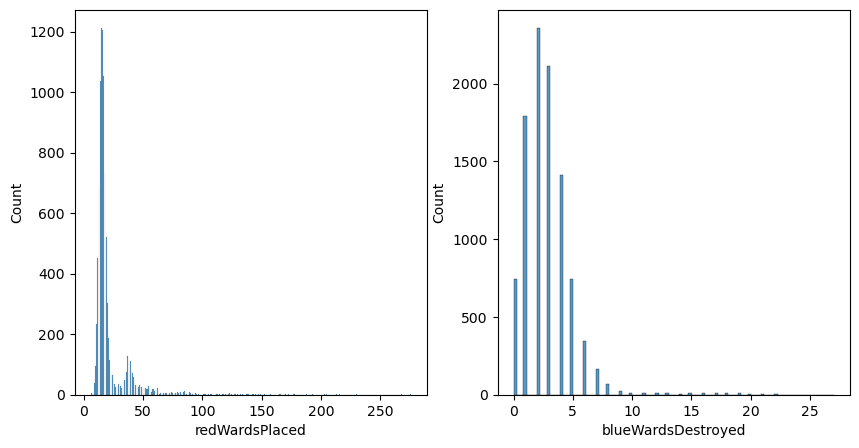

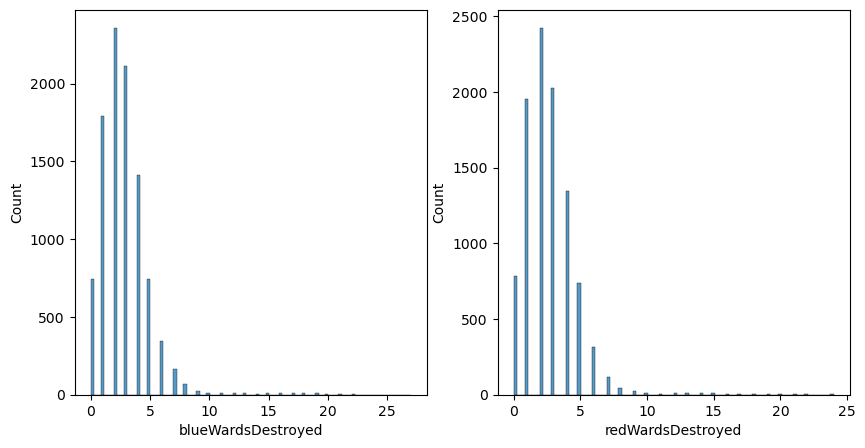

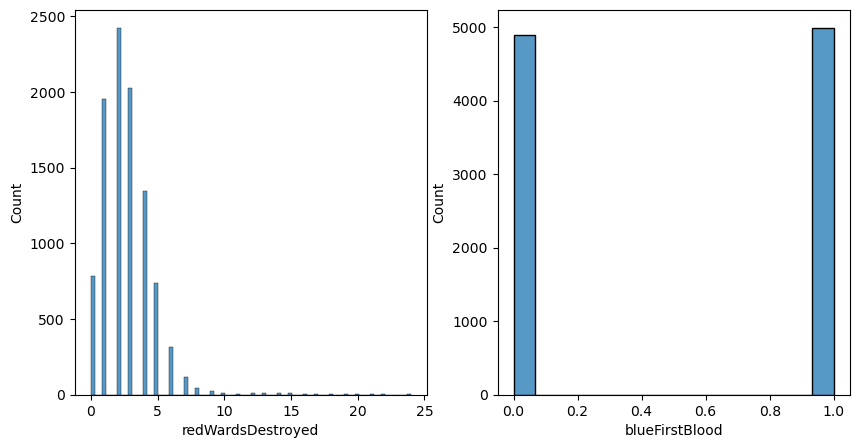

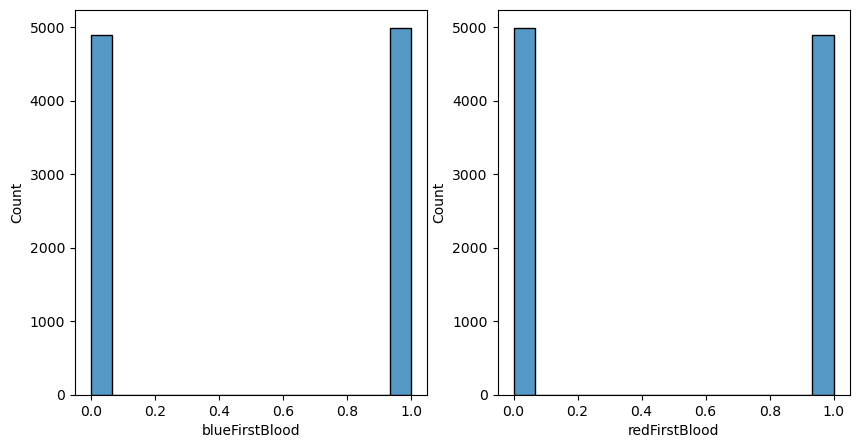

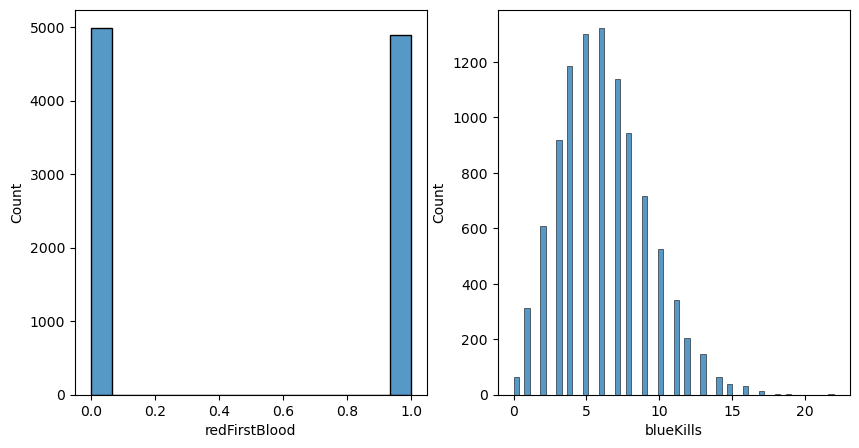

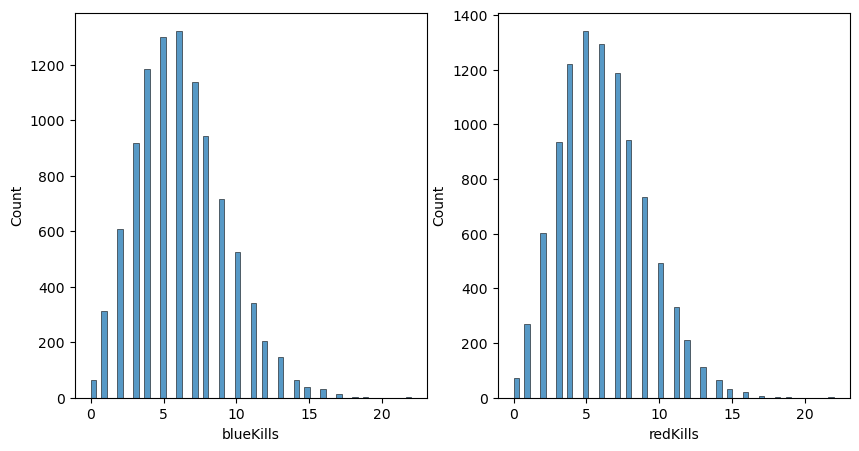

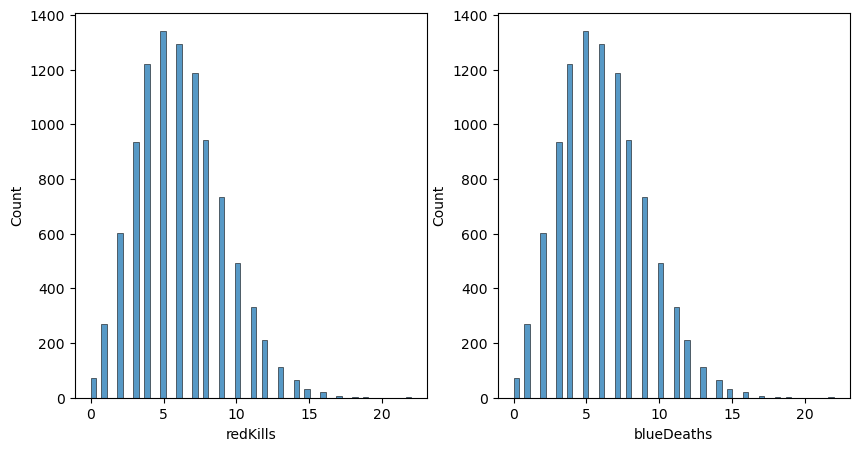

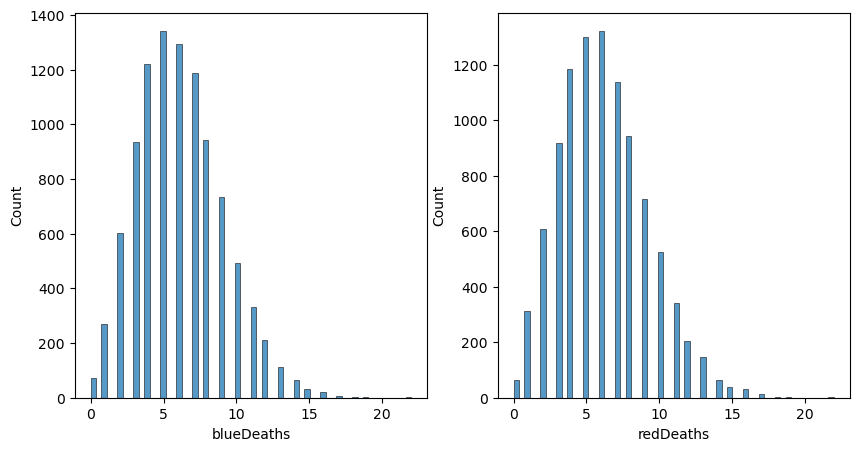

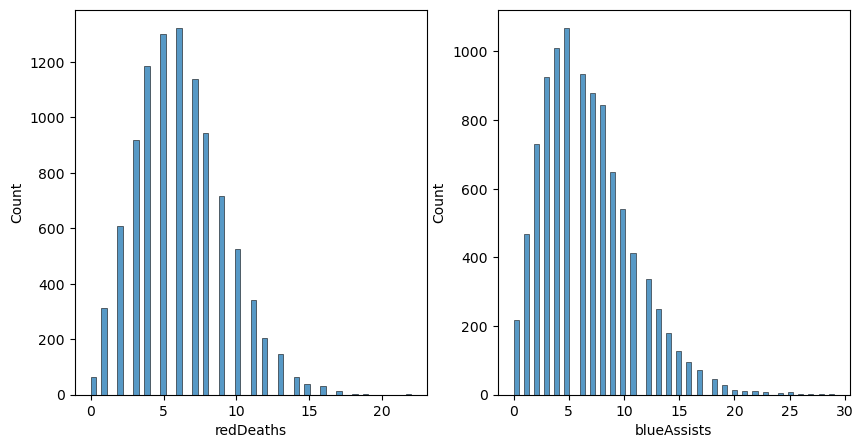

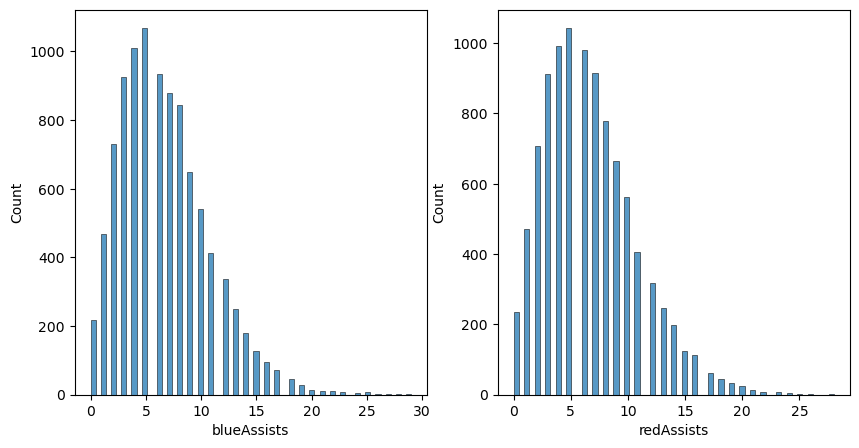

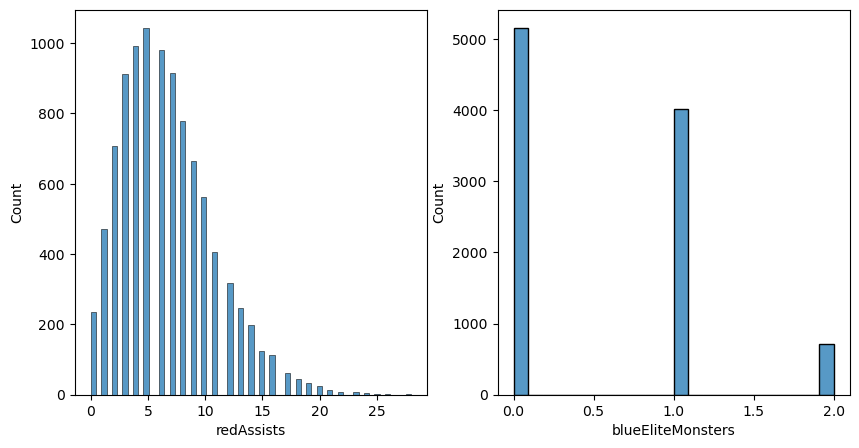

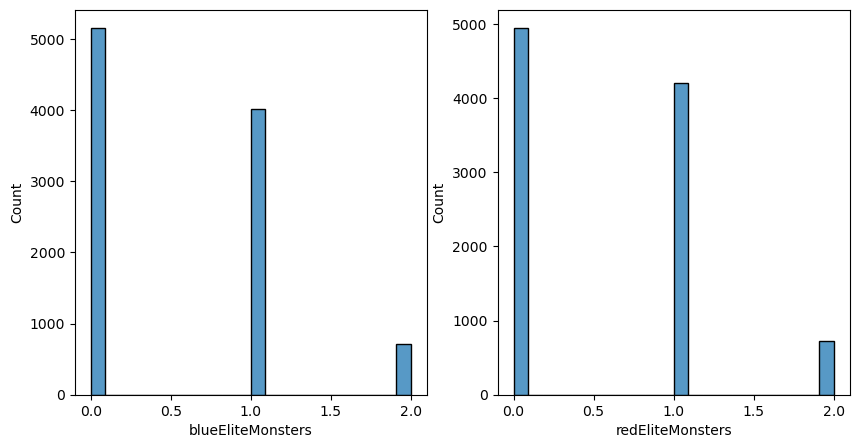

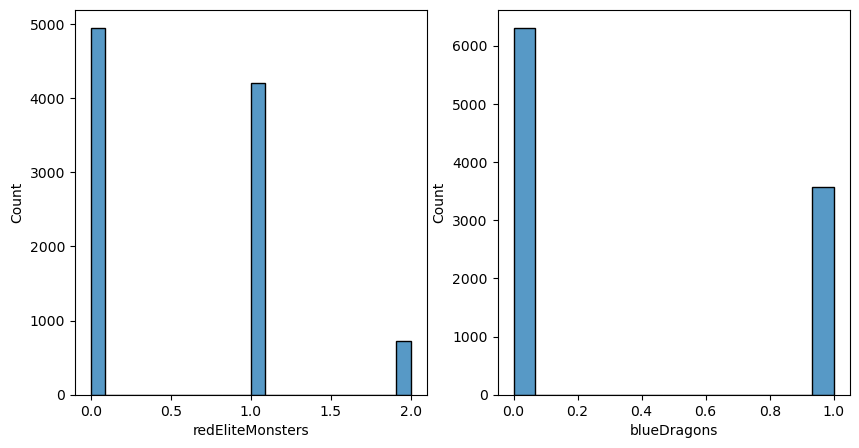

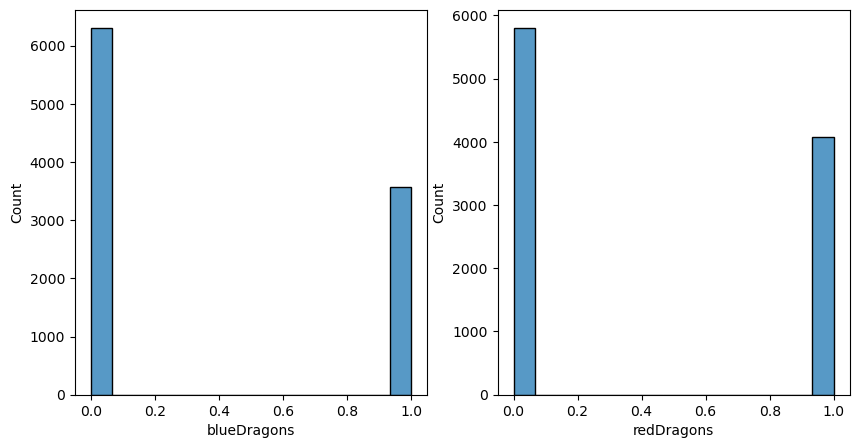

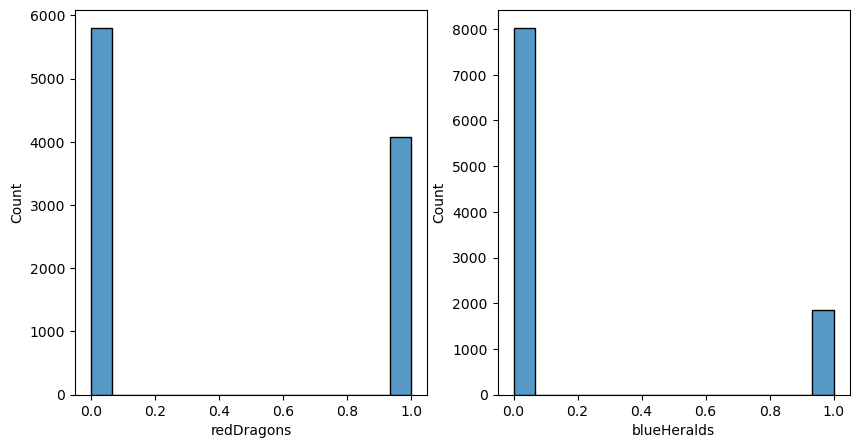

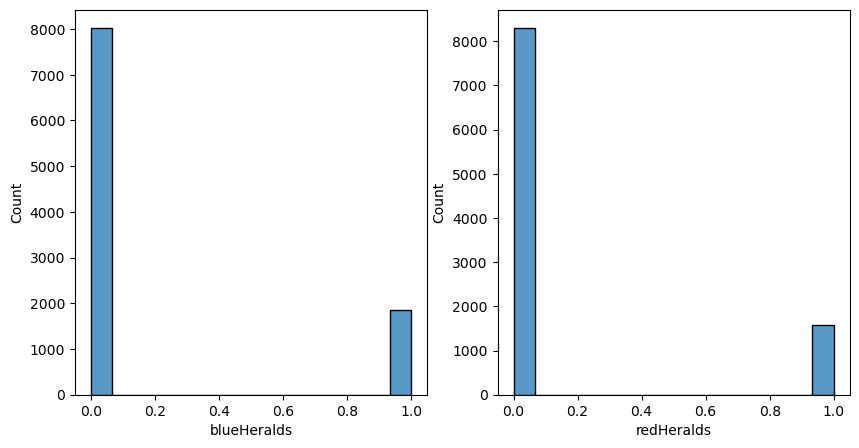

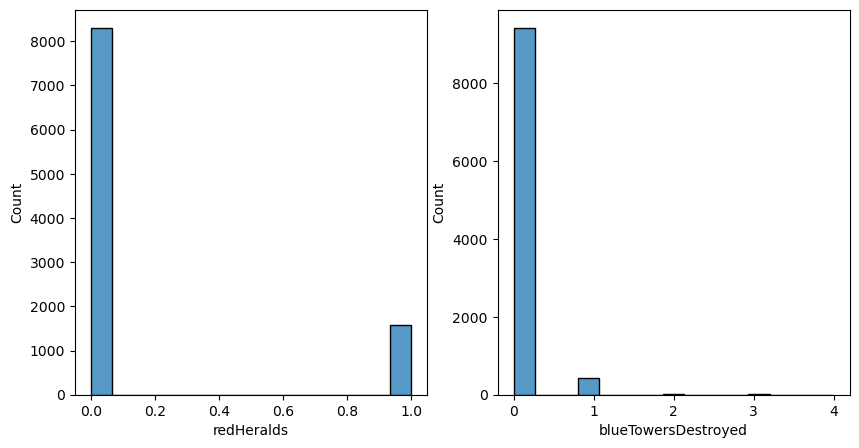

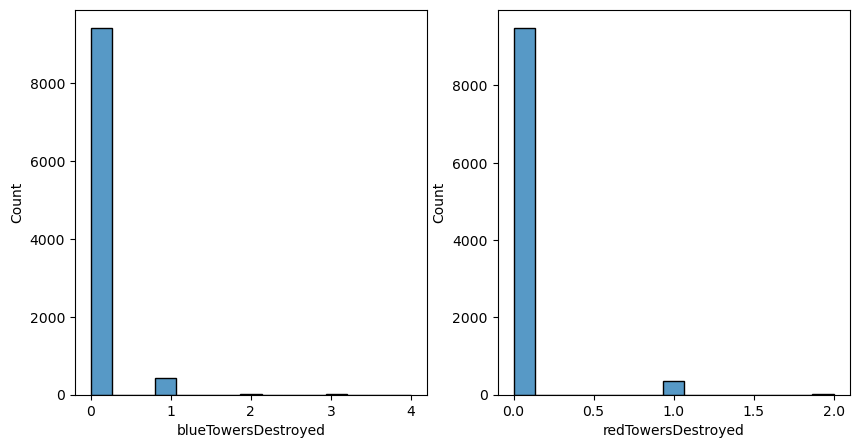

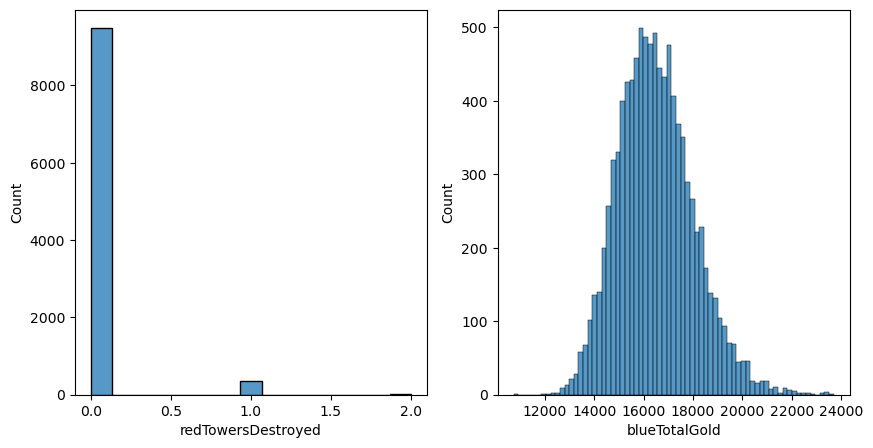

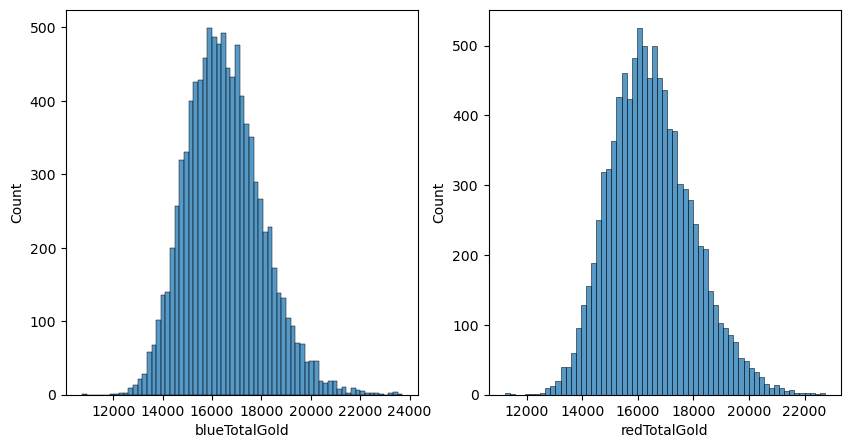

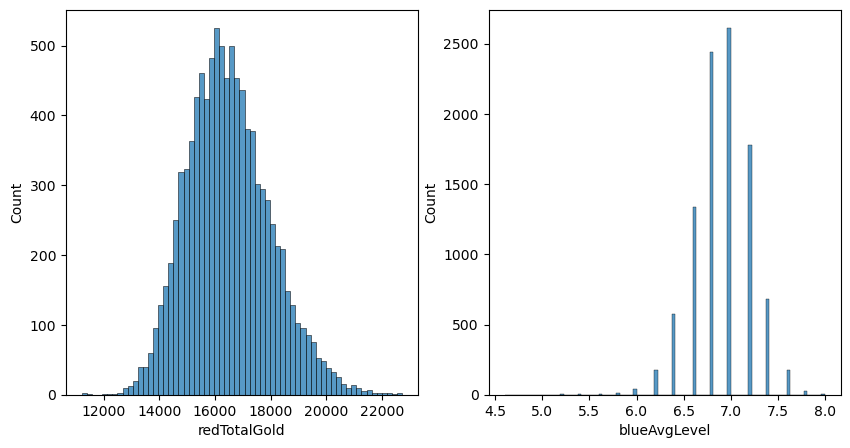

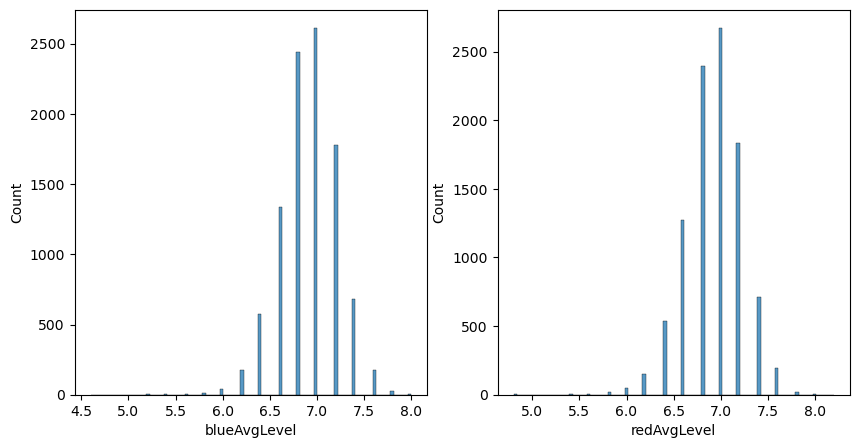

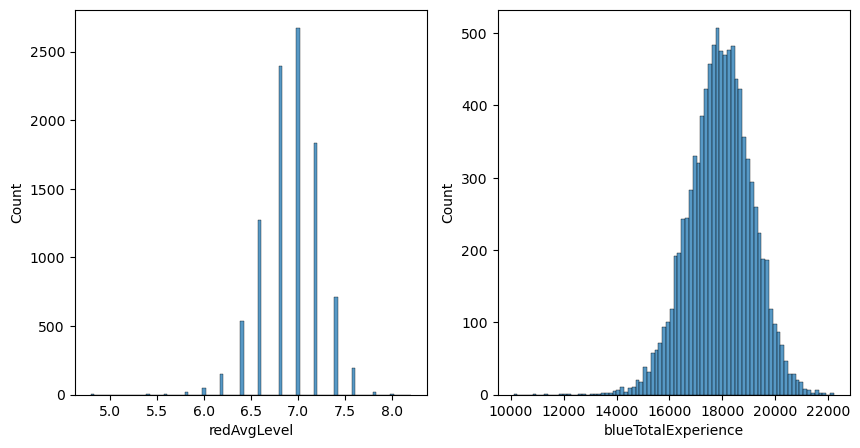

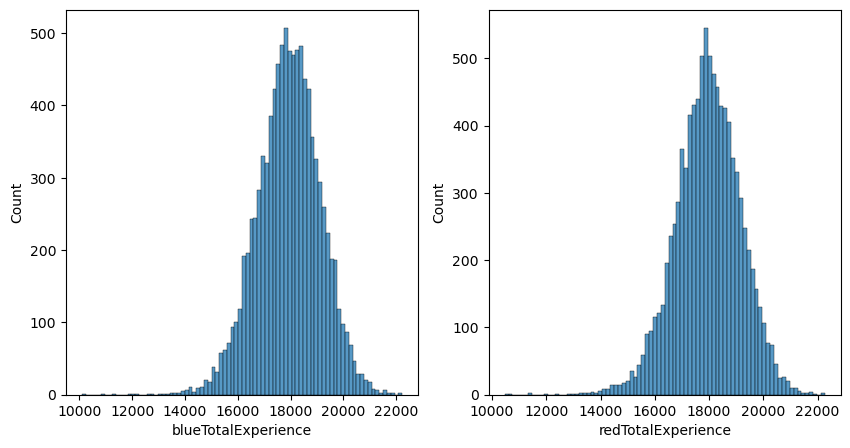

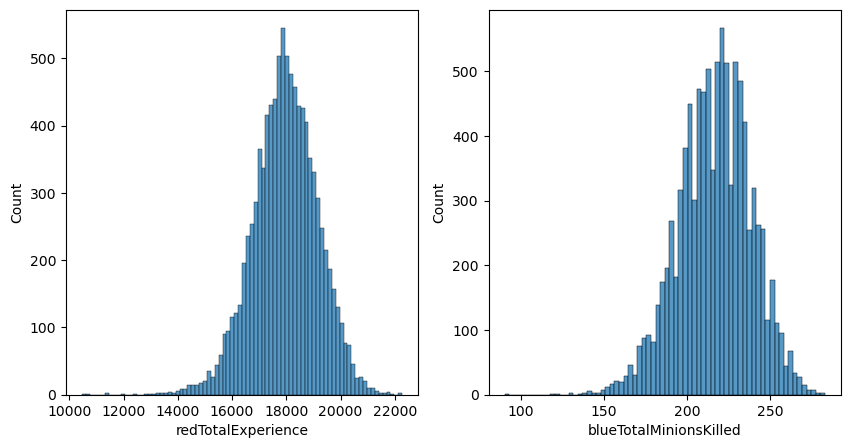

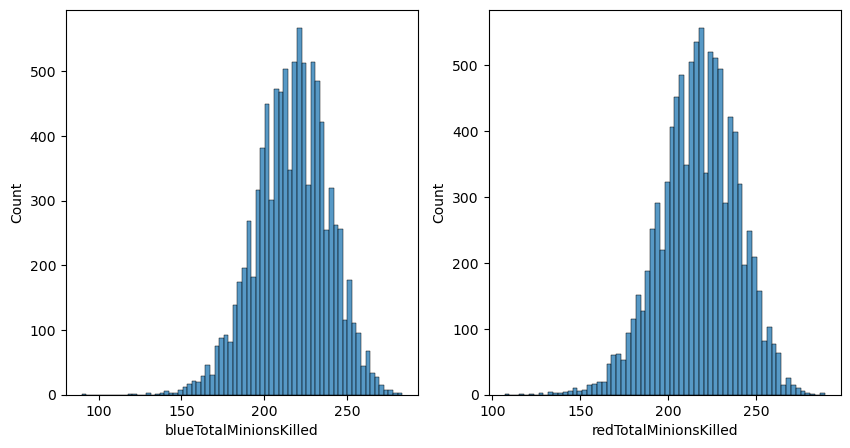

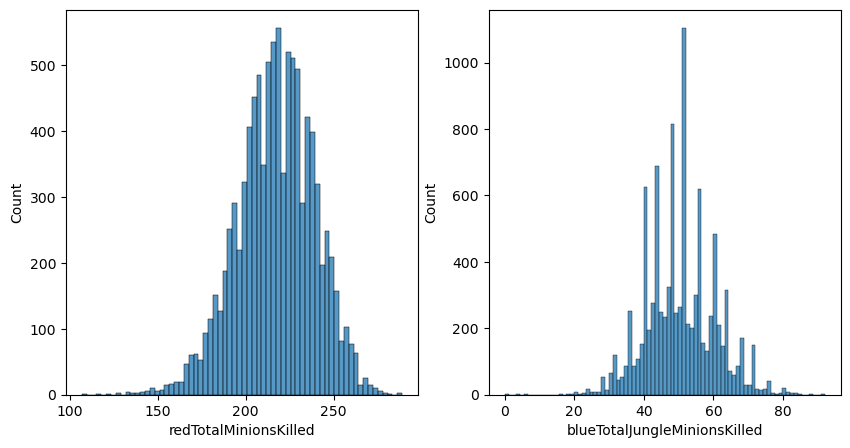

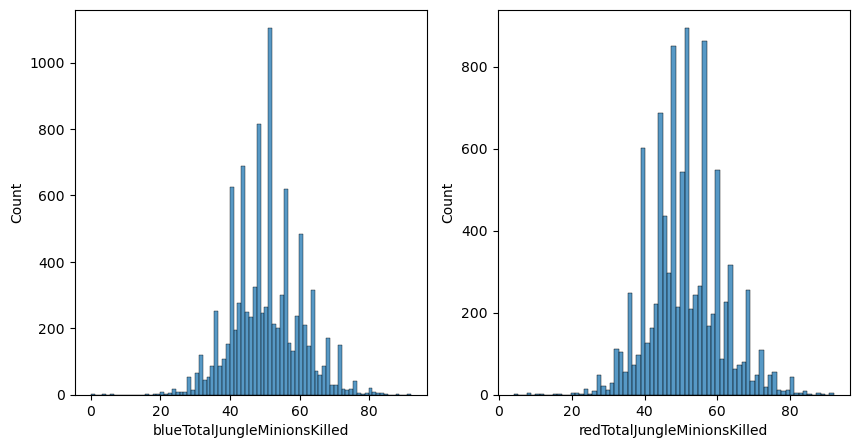

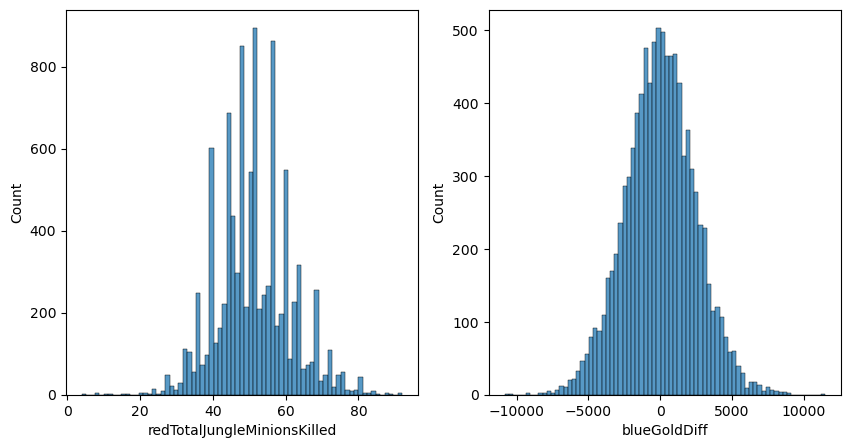

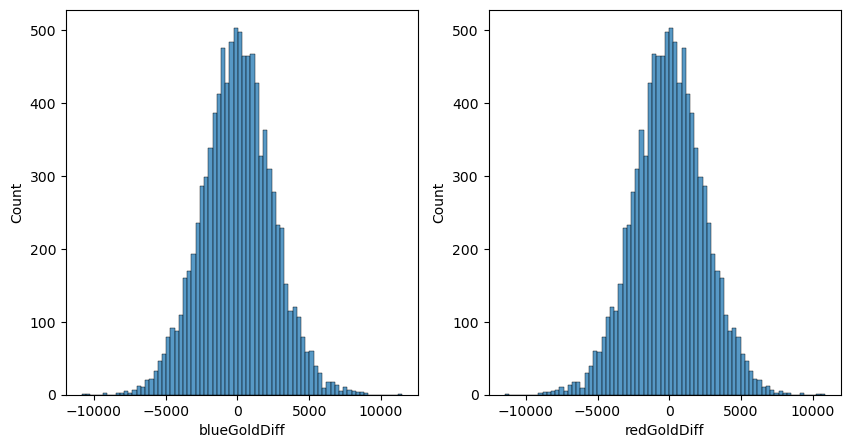

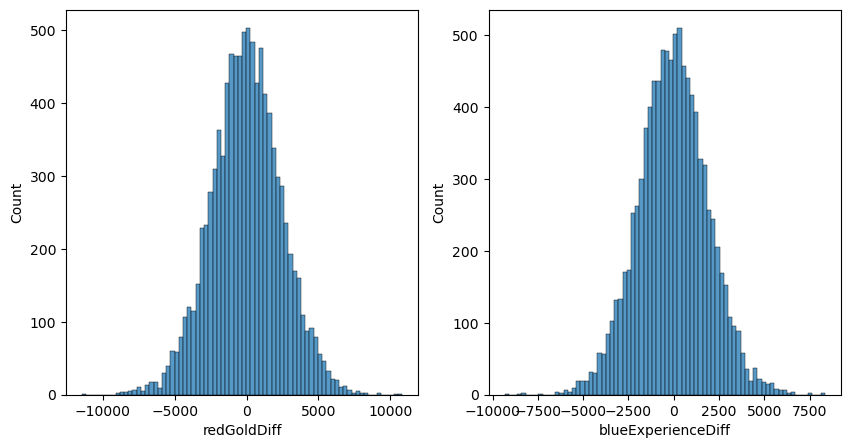

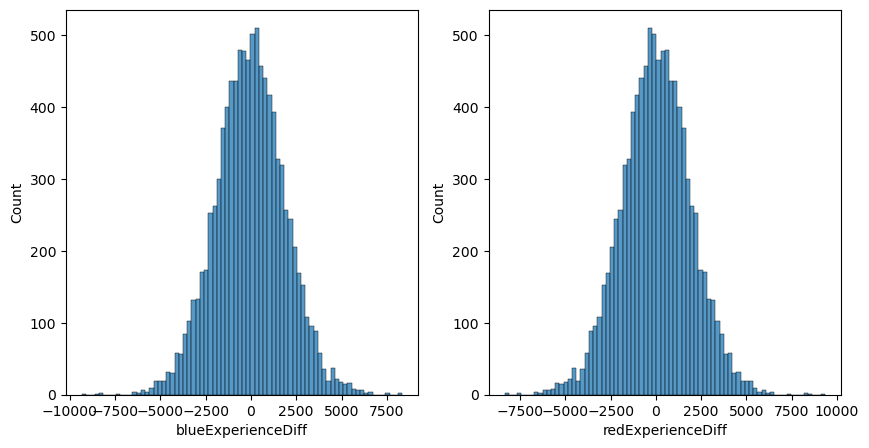

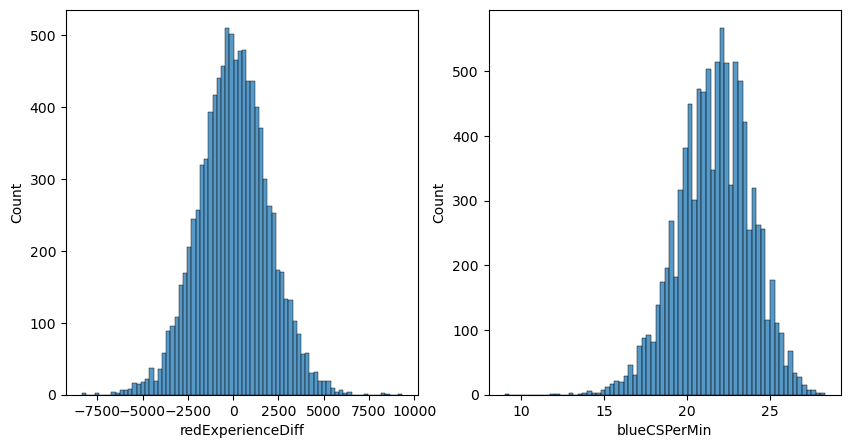

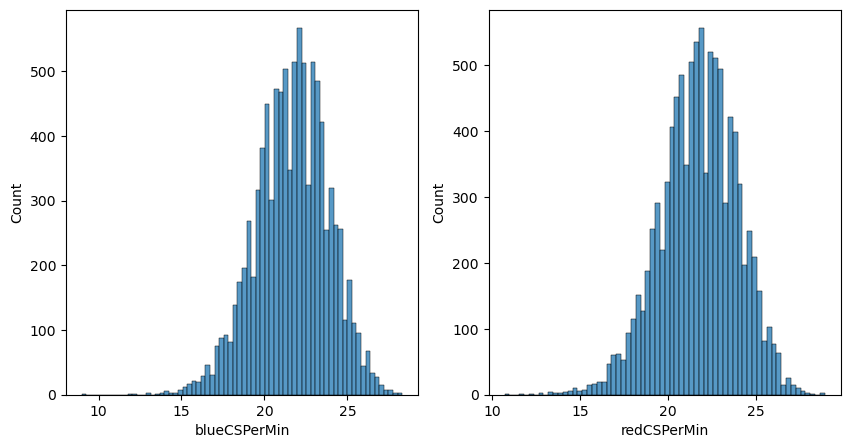

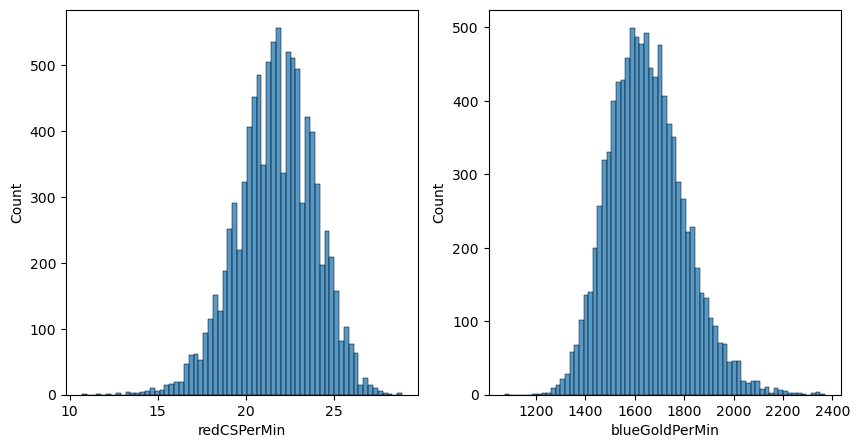

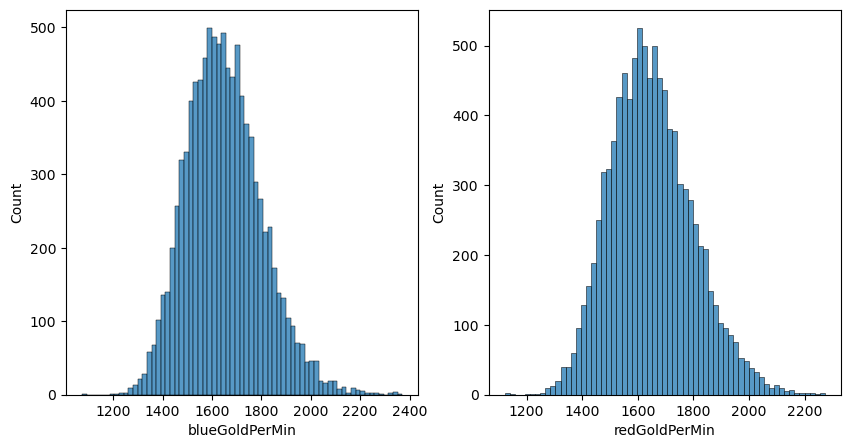

In [22]:
for i in range(1, 38):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    sns.histplot(data=df, x=hist_arr[i-1], ax=ax[0])
    sns.histplot(data=df, x=hist_arr[i], ax=ax[1])
    plt.show()

In [24]:
X = df.drop("blueWins", axis=1)
y = df["blueWins"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [31]:
cat = [col for col in X_train.columns if X_train[col].nunique() < 4]
num = [col for col in X_train.columns if col not in cat]

In [32]:
sc = StandardScaler()
sc.fit(X_train[num])
X_train_sca = sc.transform(X_train[num])
X_test_sca = sc.transform(X_test[num])

In [33]:
tpot = TPOTClassifier(max_time_mins=10, population_size=10, verbosity=2, n_jobs=-1)
tpot.fit(X_train_sca, y_train)

Version 0.11.7 of tpot is outdated. Version 0.12.0 was released Thursday May 25, 2023.


Optimization Progress:   0%|          | 0/10 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7318872017353579

Generation 2 - Current best internal CV score: 0.7318872017353579

Generation 3 - Current best internal CV score: 0.7328994938539407

Generation 4 - Current best internal CV score: 0.7328994938539407

Generation 5 - Current best internal CV score: 0.7328994938539407

Generation 6 - Current best internal CV score: 0.7336225596529283

Generation 7 - Current best internal CV score: 0.7336225596529283

Generation 8 - Current best internal CV score: 0.734056399132321

Generation 9 - Current best internal CV score: 0.734056399132321

Generation 10 - Current best internal CV score: 0.734056399132321

Generation 11 - Current best internal CV score: 0.734056399132321

Generation 12 - Current best internal CV score: 0.734056399132321

Generation 13 - Current best internal CV score: 0.734056399132321

Generation 14 - Current best internal CV score: 0.7342010122921185

Generation 15 - Current best internal CV score: 0.734201012292

TPOTClassifier(max_time_mins=10, n_jobs=-1, population_size=10, verbosity=2)

In [34]:
tpot.score(X_test_sca, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py:794: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


0.7128879892037787

In [35]:
tpot.export("lol_win.py")